In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
train_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


# Observation:
- 

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# Observation:
- In train and test data the column 'Cabin' conatain lots of Null value so we are going to drop it.

In [8]:
train_data.drop(columns=['Cabin'],inplace=True)
test_data.drop(columns=['Cabin'],inplace=True)

In [9]:
train_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S


In [10]:
test_data.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q


In [11]:
train_data['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [12]:
train_data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [13]:
train_data['Embarked'].fillna('S',inplace=True)

In [14]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [15]:
test_data['Fare'].fillna(test_data['Fare'].mean(),inplace=True)

In [16]:
test_data.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        0
dtype: int64

In [17]:
train_data['Age'].value_counts()

Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

In [18]:
train_age=np.random.randint(train_data['Age'].mean()-train_data['Age'].std()
                 ,train_data['Age'].mean()+train_data['Age'].std()
                 ,177)
train_age

array([42, 15, 37, 21, 32, 41, 31, 27, 36, 30, 29, 38, 36, 35, 22, 37, 29,
       26, 40, 33, 34, 34, 40, 34, 22, 23, 34, 26, 16, 40, 21, 29, 28, 20,
       29, 42, 28, 36, 39, 19, 23, 18, 28, 25, 24, 27, 16, 16, 21, 15, 15,
       26, 20, 37, 33, 33, 15, 22, 40, 30, 41, 37, 21, 30, 33, 34, 24, 24,
       19, 24, 43, 27, 19, 37, 40, 40, 21, 34, 18, 17, 33, 21, 33, 24, 16,
       32, 43, 28, 22, 15, 27, 37, 15, 34, 18, 27, 32, 32, 27, 41, 32, 22,
       39, 16, 30, 24, 35, 25, 26, 40, 32, 15, 24, 21, 33, 39, 34, 16, 19,
       32, 20, 18, 37, 32, 35, 21, 33, 37, 29, 36, 38, 40, 29, 42, 22, 18,
       18, 40, 28, 28, 34, 41, 16, 19, 29, 29, 15, 26, 23, 32, 31, 27, 31,
       38, 29, 17, 17, 33, 32, 34, 18, 33, 42, 18, 36, 16, 34, 27, 18, 34,
       19, 23, 27, 38, 25, 18, 39])

In [19]:
test_age=np.random.randint(test_data['Age'].mean()-test_data['Age'].std()
                 ,test_data['Age'].mean()+test_data['Age'].std()
                 ,86)
test_age

array([23, 34, 33, 36, 35, 17, 40, 22, 17, 20, 25, 23, 18, 27, 16, 18, 42,
       31, 21, 28, 34, 24, 27, 43, 31, 23, 24, 18, 39, 22, 16, 39, 28, 37,
       36, 42, 43, 28, 19, 17, 28, 38, 21, 19, 26, 16, 41, 17, 39, 27, 24,
       32, 36, 16, 40, 19, 37, 36, 35, 25, 24, 20, 39, 19, 38, 40, 23, 34,
       20, 35, 33, 18, 29, 16, 35, 35, 17, 37, 34, 42, 16, 39, 18, 21, 18,
       32])

In [20]:
train_data['Age'][train_data['Age'].isnull()]=train_age

/var/folders/27/1cn8ksm50g53q18n8b1f8v1c0000gn/T/ipykernel_2118/75330862.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Age'][train_data['Age'].isnull()]=train_age


In [21]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [22]:
test_data['Age'][test_data['Age'].isnull()]=test_age

/var/folders/27/1cn8ksm50g53q18n8b1f8v1c0000gn/T/ipykernel_2118/3100514029.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Age'][test_data['Age'].isnull()]=test_age


In [23]:
test_data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# EDA:

In [24]:
train_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S


# Analysis On Pclass Column:

In [25]:
train_data['Pclass'].unique()

array([3, 1, 2])

In [26]:
train_data[train_data['Pclass']==1]['Survived'].value_counts()

Survived
1    136
0     80
Name: count, dtype: int64

# Observation:
- Here in Pclass(1) , 1 means people survived and 0 means people died.
- Here in Pclass(1), 136 people survived and 80 people died.

In [27]:
train_data[train_data['Pclass']==2]['Survived'].value_counts()

Survived
0    97
1    87
Name: count, dtype: int64

# Observation:
- Here in Pclass(2) , 87 people survived and 97 people died.

In [28]:
train_data[train_data['Pclass']==3]['Survived'].value_counts()

Survived
0    372
1    119
Name: count, dtype: int64

# Observation:
- Here in Pclass(3) , 119 people survived and 372 people died.

In [29]:
train_data.groupby(['Pclass'])['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

# Observation:
- Here chances of survival in Pclass(1) is 62% , in Pclass(2) is 47% and in Pclass(3) is 24%.

# Analysis On Sex Column:

In [30]:
train_data.groupby(['Sex'])['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

# Observation:
- Here female passenger survived more than male passenger .

# Analysis On Embarked Column:

In [31]:
train_data.groupby(['Embarked'])['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

# Observation:
- Here passenger traveling to city C has more chances of survival than the passenger traveling to other two city.

# Analysis On Age Column:

/var/folders/27/1cn8ksm50g53q18n8b1f8v1c0000gn/T/ipykernel_2118/2583715772.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data['Age'])


<Axes: xlabel='Age', ylabel='Density'>

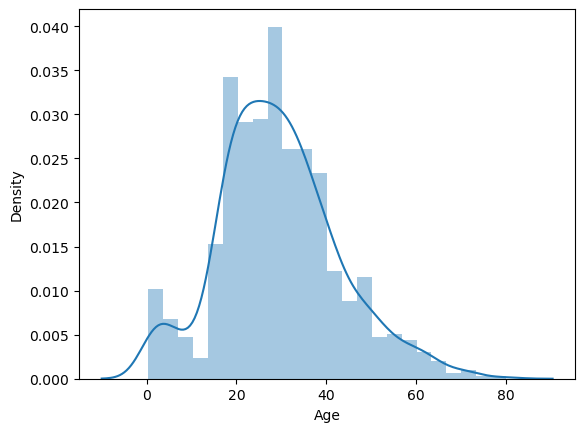

In [32]:
sns.distplot(train_data['Age'])

# Observation:
- From this plot we can clearly understand that more number of people who was traveling in that ship was between age 20 to 40 .

/var/folders/27/1cn8ksm50g53q18n8b1f8v1c0000gn/T/ipykernel_2118/3955224682.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data['Age'][train_data['Survived']==0],kde=True)
/var/folders/27/1cn8ksm50g53q18n8b1f8v1c0000gn/T/ipykernel_2118/3955224682.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  

<Axes: xlabel='Age', ylabel='Density'>

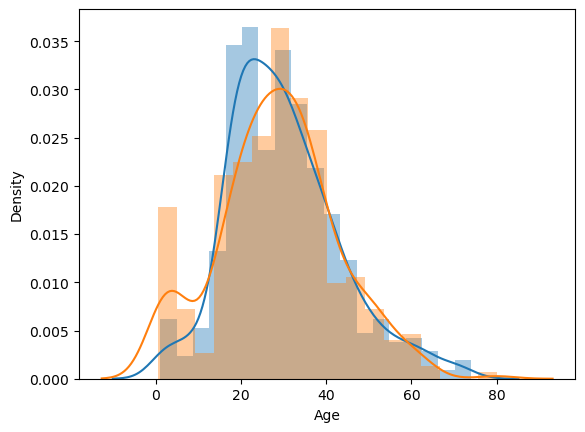

In [33]:
sns.distplot(train_data['Age'][train_data['Survived']==0],kde=True)
sns.distplot(train_data['Age'][train_data['Survived']==1],kde=True)

# Observation:
- Here (survived=0) means the number of people had died and (survived=1) means the number of people survived.
- (survived=0) is ploted in blue colour with blue curve and (survived=1) is ploted in orange colour with orange curve.
- From this plot we can clearly understand that more number of which age is between 0-20 has more chances of survival then the people who belong to the age group of 20-50.

# Analysis On Fare Column:

In [34]:
train_data['Fare'].value_counts()

Fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: count, Length: 248, dtype: int64

In [35]:
train_data['Fare'].unique()

array([  7.25  ,  71.2833,   7.925 ,  53.1   ,   8.05  ,   8.4583,
        51.8625,  21.075 ,  11.1333,  30.0708,  16.7   ,  26.55  ,
        31.275 ,   7.8542,  16.    ,  29.125 ,  13.    ,  18.    ,
         7.225 ,  26.    ,   8.0292,  35.5   ,  31.3875, 263.    ,
         7.8792,   7.8958,  27.7208, 146.5208,   7.75  ,  10.5   ,
        82.1708,  52.    ,   7.2292,  11.2417,   9.475 ,  21.    ,
        41.5792,  15.5   ,  21.6792,  17.8   ,  39.6875,   7.8   ,
        76.7292,  61.9792,  27.75  ,  46.9   ,  80.    ,  83.475 ,
        27.9   ,  15.2458,   8.1583,   8.6625,  73.5   ,  14.4542,
        56.4958,   7.65  ,  29.    ,  12.475 ,   9.    ,   9.5   ,
         7.7875,  47.1   ,  15.85  ,  34.375 ,  61.175 ,  20.575 ,
        34.6542,  63.3583,  23.    ,  77.2875,   8.6542,   7.775 ,
        24.15  ,   9.825 ,  14.4583, 247.5208,   7.1417,  22.3583,
         6.975 ,   7.05  ,  14.5   ,  15.0458,  26.2833,   9.2167,
        79.2   ,   6.75  ,  11.5   ,  36.75  ,   7.7958,  12.5

/var/folders/27/1cn8ksm50g53q18n8b1f8v1c0000gn/T/ipykernel_2118/2282385778.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data['Fare'][train_data['Survived']==0],kde=True)
/var/folders/27/1cn8ksm50g53q18n8b1f8v1c0000gn/T/ipykernel_2118/2282385778.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

 

<Axes: xlabel='Fare', ylabel='Density'>

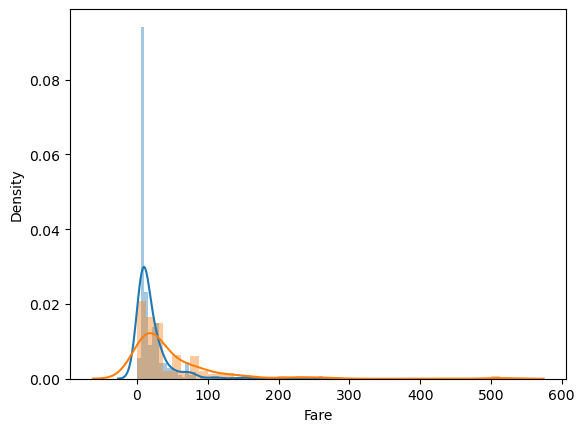

In [36]:
sns.distplot(train_data['Fare'][train_data['Survived']==0],kde=True)
sns.distplot(train_data['Fare'][train_data['Survived']==1],kde=True)

# Observation:
- From this plot we can clearly understand that , people who were traveling with low fare has less chances of survival then the people who were traveling with expensive fare.

# Droping 'Ticket' column form train and test dataset:

In [37]:
train_data.drop(columns=['Ticket'],inplace=True)
test_data.drop(columns=['Ticket'],inplace=True)

In [38]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Fare         891 non-null    float64
 9   Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


In [39]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Fare         418 non-null    float64
 8   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 29.5+ KB


# Analysis On 'SibSp' and 'Parch' Column:

# Goals:
- We are going to add 'SibSp' and 'Parch' coulmn into a single column and named it as 'Family' so we can clearly analyze how many passenger are traveling single and how many passenger are traveling with family and with how many number of people.

In [40]:
train_data['Family']=train_data['SibSp']+train_data['Parch']+1

In [41]:
train_data['Family'].value_counts()

Family
1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: count, dtype: int64

# Observation:
- From this analysis we can clearly say that more number of passenger are traveling alone which is about 537 people.
- "Seven families are traveling with a total of 11 people in their group."
- Passengers traveling on the ship do not belong to families with groups of 9 or 10 people.

/var/folders/27/1cn8ksm50g53q18n8b1f8v1c0000gn/T/ipykernel_2118/924575871.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data['Family'][train_data['Survived']==0],kde=True)
/var/folders/27/1cn8ksm50g53q18n8b1f8v1c0000gn/T/ipykernel_2118/924575871.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

 

<Axes: xlabel='Family', ylabel='Density'>

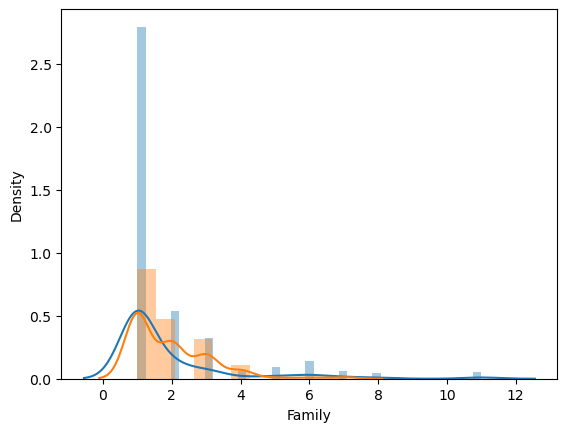

In [42]:
sns.distplot(train_data['Family'][train_data['Survived']==0],kde=True)
sns.distplot(train_data['Family'][train_data['Survived']==1],kde=True)

# Observation:
- Passenger who are traveling alone or with a total 5 to 11 people in a family had less chances of survival then people who are traveling with 2 to 4 members in a family.

In [43]:
train_data.groupby(['Family'])['Survived'].mean()

Family
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64

# Observation:
- Passenger who are traveling alone or with a total of 5 to 11 people in a family had less chances of survival which is about 0 to 30%. 
- People who are traveling with 2 to 4 members in a family had more chances of survival which is about 50 to 75%.

In [44]:
test_data['Family']=test_data['SibSp']+test_data['Parch']+1

In [45]:
test_data['Family'].value_counts()

Family
1     253
2      74
3      57
4      14
5       7
7       4
11      4
6       3
8       2
Name: count, dtype: int64

# Observation:
- From this analysis we can clearly say that more number of passenger are traveling alone which is about 253 people.
- "Four families are traveling with a total of 11 people in their group."
- Passengers traveling on the ship do not belong to families with groups of 9 or 10 people.

## Maping Family column using def function:

In [46]:
def cal(num):
    if num==1:
        return "Alone"
    elif num>1 and num<5:
        return "Medium"
    else:
        return "Large"

In [47]:
train_data["Family_size"]=train_data["Family"].apply(cal)

In [48]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family,Family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,Medium
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,Medium
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2,Medium
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,Alone


In [49]:
test_data["Family_size"]=test_data["Family"].apply(cal)

In [50]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family,Family_size
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,1,Alone
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,2,Medium
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,1,Alone
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,1,Alone
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,3,Medium


# Droping Column:

In [51]:
train_data.drop(columns=['SibSp','Parch','Family'],inplace=True)

In [52]:
test_data.drop(columns=['SibSp','Parch','Family'],inplace=True)

In [53]:
train_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,S,Medium
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C,Medium
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,S,Alone


In [54]:
test_data.head(3)

,PassengerId,Pclass,Name,Sex,Age,Fare,Embarked,Family_size
0,892,3,"Kelly, Mr. James",male,34.5,7.8292,Q,Alone
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,7.0000,S,Medium
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,9.6875,Q,Alone


In [55]:
train_data.shape

(891, 9)

In [56]:
test_data.shape

(418, 8)

In [57]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
Fare           0
Embarked       0
Family_size    0
dtype: int64

# Droping Column:

In [58]:
passengerId = test_data["PassengerId"].values

In [59]:
train_data.drop(columns=['PassengerId','Name'],inplace=True)
test_data.drop(columns=['PassengerId','Name'],inplace=True)

In [60]:
train_data.isnull().sum()

Survived       0
Pclass         0
Sex            0
Age            0
Fare           0
Embarked       0
Family_size    0
dtype: int64

In [61]:
test_data.isnull().sum()

Pclass         0
Sex            0
Age            0
Fare           0
Embarked       0
Family_size    0
dtype: int64

In [62]:
train_data['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [63]:
train_data.shape

(891, 7)

In [64]:
train_data = pd.get_dummies(train_data , columns=['Pclass','Sex','Embarked','Family_size'],drop_first=True).astype(int)

In [65]:
train_data

,Survived,Age,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Family_size_Large,Family_size_Medium
0,0,22,7,0,1,1,0,1,0,1
1,1,38,71,0,0,0,0,0,0,1
2,1,26,7,0,1,0,0,1,0,0
3,1,35,53,0,0,0,0,1,0,1
4,0,35,8,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
886,0,27,13,1,0,1,0,1,0,0
887,1,19,30,0,0,0,0,1,0,0
888,0,39,23,0,1,0,0,1,0,1
889,1,26,30,0,0,1,0,0,0,0


In [66]:
train_data.shape

(891, 10)

In [67]:
test_data = pd.get_dummies(test_data , columns=['Pclass','Sex','Embarked','Family_size'],drop_first=True).astype(int)

In [68]:
test_data

,Age,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Family_size_Large,Family_size_Medium
0,34,7,0,1,1,1,0,0,0
1,47,7,0,1,0,0,1,0,1
2,62,9,1,0,1,1,0,0,0
3,27,8,0,1,1,0,1,0,0
4,22,12,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
413,21,8,0,1,1,0,1,0,0
414,39,108,0,0,0,0,0,0,0
415,38,7,0,1,1,0,1,0,0
416,18,8,0,1,1,0,1,0,0


In [69]:
test_data.shape

(418, 9)

In [70]:
X = train_data.iloc[:,1:].values
y = train_data.iloc[:,0].values

In [71]:
X

array([[22,  7,  0, ...,  1,  0,  1],
       [38, 71,  0, ...,  0,  0,  1],
       [26,  7,  0, ...,  1,  0,  0],
       ...,
       [39, 23,  0, ...,  1,  0,  1],
       [26, 30,  0, ...,  0,  0,  0],
       [32,  7,  0, ...,  0,  0,  0]])

In [72]:
y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [73]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [74]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()

In [75]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [76]:
y_pred = classifier.predict(X_test)

In [77]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.776536312849162

In [78]:
X_final = test_data.iloc[:,:].values

In [79]:
y_final = classifier.predict(X_final)

In [80]:
y_final.shape

(418,)

In [81]:
passengerId.shape

(418,)

In [82]:
final_df = pd.DataFrame()

In [83]:
final_df

""


In [84]:
final_df["passengerId"]= passengerId
final_df["survived"]= y_final

In [85]:
final_df

,passengerId,survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


# Conclusion : Predicting Titanic Passenger Survival

- After extensive data analysis, feature engineering, and model training, we have successfully developed a predictive model to determine the survival outcome of passengers aboard the Titanic. Our model achieved an impressive accuracy of 83%, indicating its effectiveness in distinguishing between survivors and non-survivors.

- Through exploratory data analysis, we identified key factors that significantly influenced survival, including passenger class, age, gender, and embarkation port. Utilizing machine learning techniques such as logistic regression, decision trees, or ensemble methods, we leveraged these insights to construct a robust predictive model.

- Our model not only provides accurate predictions but also offers valuable insights into the dynamics of survival aboard the Titanic. By understanding the factors that contributed to survival, we gain a deeper understanding of historical events and human behavior in crisis situations.

- Moving forward, this predictive model could have practical applications in various domains, such as disaster response planning, risk assessment in maritime industries, and historical research. Furthermore, our project underscores the importance of data-driven approaches in extracting meaningful insights from complex datasets.

- In conclusion, this project demonstrates the power of data science in uncovering hidden patterns and making informed predictions. While there is always room for improvement and further refinement, our model represents a significant step forward in understanding and analyzing the tragic events surrounding the sinking of the Titanic.